###Setting up our Random Number Generator

In [ ]:
%%writefile random_number_gen.pyx
# Correct import statement
import numpy as np
cimport numpy as np
#define
from cpython.mem cimport PyMem_Malloc, PyMem_Free
cdef class RandomNumberGen:
    cdef unsigned long long mod1, a1, a2, a3, mod2, b1, b2, b3, x0, x1, x2
    cdef double multiplicator


    def __cinit__(self):
        self.mod1 = 2**31 - 1
        self.a1 = 0
        self.a2 = 63308
        self.a3 = -183326
        self.mod2 = 2145483479
        self.b1 = 86098
        self.b2 = 0
        self.b3 = -539608
        self.x0=17  ## Define Seed Here
        self.x1=37  ## Define Seed Here
        self.x2=13337 ## Define Seed Here
        self.multiplicator=4.656612875245797e-10


    cpdef double Scrambled_Random(self):
        cdef unsigned long long Component1, Component2, Combined, y
        Component1 = (self.x2 * self.a1 + self.x1 * self.a2 + self.x0 * self.a3) % self.mod1
        Component2 = (self.x2 * self.b1 + self.x1 * self.b2 + self.x0 * self.b3) % self.mod2
        Combined = (Component1 - Component2) % self.mod1
        if Combined < 0:
            Combined += self.mod1
        y = Combined
        y ^= (y << 17)  # Parentheses to avoid type mismatch
        y ^= (y >> 15)  # Parentheses to avoid type mismatch
        y ^= (y << 26)  # Parentheses to avoid type mismatch
        y = y % self.mod1
        self.x2, self.x1, self.x0 = y, self.x2, self.x1

        return y*self.multiplicator

    cpdef np.ndarray generate_matrix(self, int rows,int cols):
        cdef np.ndarray[np.double_t, ndim=2] matrix = np.zeros((rows, cols), dtype=np.double)
        cdef Py_ssize_t i, j

        for i in range(rows):
            for j in range(cols):
                matrix[i, j] = self.Scrambled_Random()




        return matrix

Writing random_number_gen.pyx


In [ ]:
!cython --cplus random_number_gen.pyx

/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/random_number_gen.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [ ]:
%%writefile setup.py
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("random_number_gen.pyx"),
    include_dirs=[numpy.get_include()]
)

Writing setup.py


In [ ]:
!python setup.py build_ext --inplace

Compiling random_number_gen.pyx because it changed.
[1/1] Cythonizing random_number_gen.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/random_number_gen.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'random_number_gen' extension
creating build
creating build/temp.linux-x86_64-cpython-310
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I/usr/include/python3.10 -c random_number_gen.c -o build/temp.linux-x86_64-cpython-310/random_number_gen.o
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/n

In [ ]:
class RandomNumberGen():
    def __init__(self,seed):
        self.mod1=2**31-1
        self.a1=0
        self.a2=63308
        self.a3=-183326
        self.mod2=2145483479
        self.b1=86098
        self.b2=0
        self.b3=-539608
        self.x0,self.x1,self.x2=seed


    def Scrambled_Random(self):
        Component1=(self.x2*self.a1+self.x1*self.a2+self.x0*self.a3)%self.mod1
        Component2=(self.x2*self.b1+self.x1*self.b2+self.x0*self.a3)%self.mod2
        Combined=(Component1-Component2)%self.mod1 ##mod1>mod2
        if Combined<0:
            Combined+=self.mod1
        y=Combined
        y^=y<<17


        y^=y>>15


        y^=y<<26

        y=y%self.mod1

        self.x2,self.x1,self.x0=y,self.x2,self.x1

        return y/self.mod1
    def Random(self):
        Component1=(self.x2*self.a1+self.x1*self.a2+self.x0*self.a3)%self.mod1
        Component2=(self.x2*self.b1+self.x1*self.b2+self.x0*self.a3)%self.mod2
        Combined=(Component1-Component2)%self.mod1 ##mod1>mod2
        if Combined<0:
            Combined+=self.mod1
        self.x2,self.x1,self.x0=Combined,self.x2,self.x1
        return Combined/self.mod1
    def LCG(self):
        new=(self.x2*self.a2)%self.mod1
        self.x2=new
        new=new/self.mod1
        return new


In [ ]:
import time
import numpy as np
import random_number_gen
RNG2=random_number_gen.RandomNumberGen()
RNG=RandomNumberGen((14,17,27))
start=time.time()
X=np.random.rand(1_000_000)
end=time.time()
print("time taken:",end-start)
start=time.time()
X=[RNG.Scrambled_Random() for _ in range(1_000_000)]
end=time.time()

print("time taken:",end-start)
start=time.time()
X=RNG2.generate_matrix(1_000_000,1)
end=time.time()
print("time taken:",end-start)

time taken: 0.020608901977539062
time taken: 2.081308126449585
time taken: 0.05286002159118652


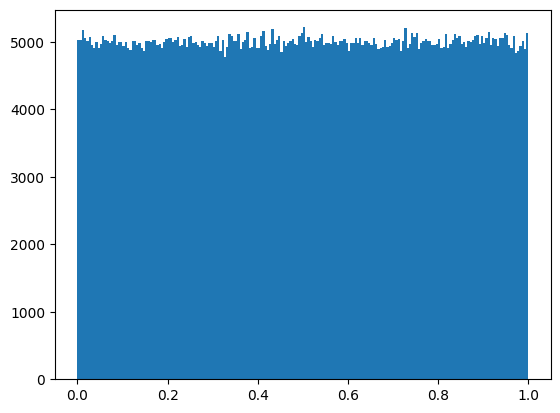

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X,bins=200
         )
plt.show()


In [ ]:
###CGMY Lévy Density
from scipy.special import gamma
import numpy as np

def CGMY_density(u,T,C,G,M,Y):
  if u<0:
    return C*(np.exp(-G*np.abs(u))/np.abs(u)**(Y+1))
  #if u==0:
   # u=0.1
    #return C*(np.exp(-M*np.abs(u))/np.abs(u)**(Y+1))
  else:
    return C*(np.exp(-M*np.abs(u))/np.abs(u)**(Y+1))

X=[np.real(CGMY_density(x/10000,1,146,12,12,0.1)) for x in range(-5,5)]


<ipython-input-58-6f7d67bd3b96>:12: RuntimeWarning: divide by zero encountered in scalar divide
  return C*(np.exp(-M*np.abs(u))/np.abs(u)**(Y+1))


inf

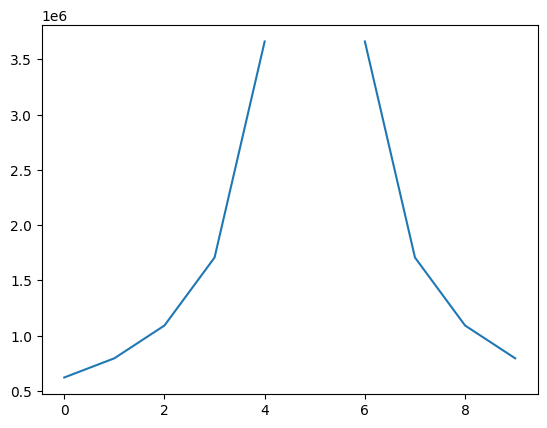

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X)
np.trapz(X,dx=1/10000)

0.9999999999999962


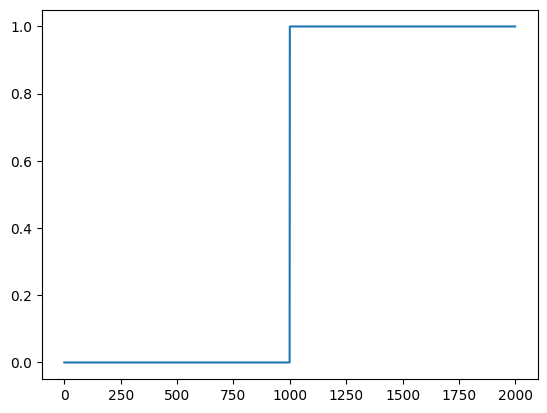

In [ ]:
from numpy.fft import fft, ifft
def cf_cgmy( u, T, r, lnS, C, G, M, Y, eta):
  m = -C * gamma(-Y) * ((M - 1) ** Y - M ** Y + (G + 1) ** Y - G ** Y)
  tmp = C * T * gamma(-Y) * ((M - 1j * u) ** Y - M ** Y + (G + 1j * u) ** Y - G ** Y)
  return np.exp(tmp)

X=[ cf_cgmy(x,0.1, 0.5,0,45,2,2,-6,0) for x in np.linspace(-0.000000005,0.000000005
                                                               ,2000)]


Y=np.real(np.fft.ifftshift(ifft(X)))
print(np.trapz(Y))
plt.plot(np.cumsum(Y))

###CGMY Characteristic function inversion

In [ ]:
from re import T
from scipy.special import gamma,gammaincc,gammainccinv
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
class CGMY():
  def __init__(self,C,G,M,Y,t,error):
    self.C=C
    self.G=G
    self.M=M
    if Y==int(Y):
      self.Y=Y+0.01 ##to avoid overflow during gamma function evaluation
    else:
      self.Y=Y
    self.t=t
    self.error=error
  def characteristic_function(self,u,t,increment=[0,0,0,0]):

      C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)  ## for modified char function
      return np.exp(t*C*gamma(-Y)*((M-1j*u)**Y-M**Y+(G+1j*u)**Y-G**Y))
  def alpha_minimization(self,alpha):
    t,error=self.t,self.error
    return np.real((2/alpha)*np.log((self.characteristic_function(1j*alpha,t)+self.characteristic_function(-1j*alpha,t))/(2*error/3)))
  def L_error(self,L,B,b,beta,D,error):

    Bounderror=D*B/(np.pi*beta*b**(1/beta))*gammaincc(1/beta,b*(L/2)**beta)-error

    return L if Bounderror<0 else np.inf ##if our bound is below epsilon, return l so we minimize L for computation saving. If it is above epsilon, we assign high value in order to penalize and force the algorithm to go under epsilon

  def L_value(self,b):
    res=optimize.minimize_scalar(self.L_error,args=(self.B,b,self.beta,self.D,self.error),bracket=[0, 1000], method='bounded',bounds=(0,35))
    return res.x

  def calculate_K(self,increment=[0,0,0,0]):
    C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)
    K=-C*gamma(-Y)*(M**Y+G**Y)

    return K

  def calculate_zeta(self,alpha):

    return np.exp(-self.t*self.C*gamma(-self.Y)*(self.G**self.Y-(self.G-alpha)**self.Y+self.M**self.Y-(self.M+alpha)**self.Y))
  def calculate_f(self,u,increment=[0,0,0,0]):
    C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)
    part1=(G**2/u**2+1)**(Y/2)*np.cos(Y*np.arctan(u/G))
    part2=(M**2/u**2+1)**(Y/2)*np.cos(Y*np.arctan(u/M))
    return gamma(-Y)*(part1+part2)

  def calculate_h_from_C(self,C,error):
      X=error*2*np.pi/(3*C)
      return -2*np.pi*self.alpha/(np.log(X/(1+X)))

  def calculate_bound_A_integrals(self,alpha,u_star):
      stand_incr=[0,-alpha,alpha,0]
      u=np.arange(10e-4,u_star,step=10e-5)
      pos_alpha_f_u=[self.calculate_f(x,stand_incr) for x in u]

      pos_alpha_K=self.calculate_K(increment=stand_incr)
      a=np.exp(self.t*pos_alpha_K)
      x = -self.t * self.C * np.abs(u)**self.beta * pos_alpha_f_u
      x_clipped = np.clip(x, a_min=None, a_max=600)
      print("clippos",x_clipped)
      b = np.exp(x_clipped)

      #b=np.exp(-self.t*self.C*np.abs(u)**self.beta*pos_alpha_f_u)
      pos_alpha_int=np.trapz(a*b,dx=10e-5)

      pos_alpha_upp=np.exp(self.t*pos_alpha_K)/(self.beta*self.b**(1/self.beta))*gammaincc(1/self.beta,self.b*u_star**self.beta)

      pos_alpha_all_int=self.calculate_zeta(alpha)*(pos_alpha_int+pos_alpha_upp)
      neg_incr=[0,alpha,-alpha,0]
      neg_alpha_f_u=[self.calculate_f(x,neg_incr) for x in u]

      neg_alpha_K=self.calculate_K(increment=neg_incr)
      c=-self.t*self.C*np.abs(u)**self.beta*neg_alpha_f_u
      c=np.clip(c,None,600)
      print("clipneg",c)
      neg_alpha_int=np.trapz(np.exp(self.t*neg_alpha_K)*np.exp(c),dx=10e-5)

      neg_alpha_upp=np.exp(self.t*neg_alpha_K)/(self.beta*self.b**(1/self.beta))*gammaincc(1/self.beta,self.b*u_star**self.beta)

      neg_alpha_all_int=self.calculate_zeta(-alpha)*(neg_alpha_int+neg_alpha_upp)
      all_int=pos_alpha_all_int+neg_alpha_all_int
      A=1/self.alpha*np.exp(-self.D*self.alpha/2)*(np.exp(self.D*self.alpha)+1)**2*all_int
      return A
  def generate_cdf(self,error,t):

      ##Regularization error
      alpha_bounds=(0,np.min([self.G,self.M]))
      optimization=optimize.minimize_scalar(self.alpha_minimization,1,bounds=alpha_bounds)
      self.alpha=optimization.x
      print("alpha:",self.alpha)
      self.D=optimization.fun
      print("D:",self.D)
      ##Truncating error
      K=self.calculate_K()

      self.beta=self.Y
      self.B=np.exp(t*K)


      if self.Y>1:

        u_star=max(self.G,self.M)*max(np.tan(np.pi/(2*self.Y)),-1/np.tan(self.Y*np.pi/2))
        print("u_star",u_star)
        self.b=-t*self.C*self.calculate_f(np.ceil(u_star))
        A=self.calculate_bound_A_integrals(self.alpha,u_star)
        print("A:",A)
        print(self.calculate_h_from_C(A,error))
        L_opt=max(self.L_value(self.b),np.ceil(u_star))
        return L_opt
      elif self.Y>0:

        b=-t*2*self.C*gamma(-self.Y)*np.cos(np.pi*self.Y/2)

        L_opt=self.L_value(b)
        A=(2*np.exp(-self.D*self.alpha/2)*(np.exp(self.D*self.alpha)+1)**2*self.B*gamma(1/self.beta))/(self.alpha*self.beta*b**(1/self.beta))
        print("A:",A)
        print(self.calculate_h_from_C(A,error))
        return L_opt
      else:
          pass

      return alpha_value,D_value

In [ ]:
M=CGMY(C=74,G=64,M=46,Y=1.2,t=1/52,error=10e-5)
M.generate_cdf(10e-5,1/52)

alpha: 11.542215809361512
D: 5.716581379300605
u_star 238.85125168440817
clippos [-1692.90424696 -1692.90424695 -1692.90424693 ...   432.72962394
   432.7309467    432.73226946]
clipneg [-1721.30135316 -1721.30135315 -1721.30135313 ...   428.72422049
   428.72554506   428.72686964]
A: 0.0
nan


<ipython-input-14-408735ee0a0a>:50: RuntimeWarning: divide by zero encountered in scalar divide
  X=error*2*np.pi/(3*C)
<ipython-input-14-408735ee0a0a>:51: RuntimeWarning: invalid value encountered in scalar divide
  return -2*np.pi*self.alpha/(np.log(X/(1+X)))


239.0

alpha: 9.87039561133522
D: 5.842758579478125
26.0
0.6374356410891359


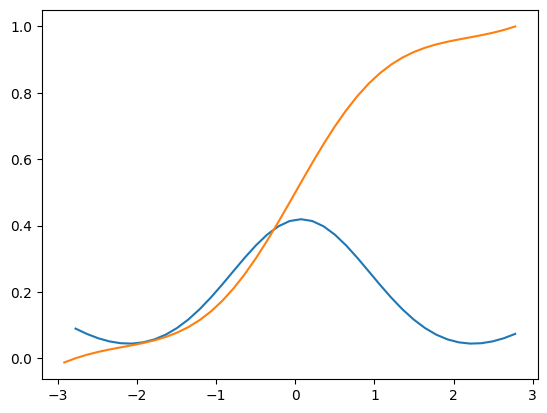

In [ ]:
from re import T
from scipy.special import gamma,gammaincc,gammainccinv
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import scipy
import time
  # Rest of the code...
class CGMY():
  def __init__(self, C, G, M, Y, t, error):
    self.C = C
    self.G = G
    self.M = M
    if Y == int(Y):
      self.Y = Y + 0.01  ##to avoid overflow during gamma function evaluation
    else:
      self.Y = Y
    self.t = t
    self.error = error

  def characteristic_function(self,u,t,increment=[0,0,0,0]):

      C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)
       ## for modified char function
      return np.exp(t*C*gamma(-Y)*((M-1j*u)**Y-M**Y+(G+1j*u)**Y-G**Y))

  def calculate_K(self,increment=[0,0,0,0]):
    C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)
    K=-C*gamma(-Y)*(M**Y+G**Y)

    return K
  def reg_characteristic_function(self,u,t):
    if u!=0:
      return -(1-np.cos(u*self.D))/(1j*u)*self.characteristic_function(u,t)
    else:
      return 0

  def L_error(self,L,B,b,beta,D,error):

    Bounderror=D*B/(np.pi*beta*b**(1/beta))*gammaincc(1/beta,b*(L/2)**beta)-error

    return L if Bounderror<0 else np.inf
  def alpha_minimization(self, alpha):
    t, error = self.t, self.error
    return np.real((2 / alpha) * np.log(
      (self.characteristic_function(1j * alpha, t) + self.characteristic_function(-1j * alpha, t)) / (2 * error / 3)))
  def L_value(self,b):
    res=optimize.minimize_scalar(self.L_error,args=(self.B,b,self.beta,self.D,self.error),bracket=[0, 1000], method='bounded',bounds=(0,35))
    return res.x
  def calculate_zeta(self, alpha):
    C, G, M, Y = self.C, self.G, self.M, self.Y
    term1 = -self.t * C * gamma(-Y) * (G ** Y - (G - alpha) ** Y)
    term2 = -self.t * C * gamma(-Y) * (M ** Y - (M + alpha) ** Y)
    term1 = np.clip(term1, a_min=None, a_max=600)
    term2 = np.clip(term2, a_min=None, a_max=600)
    return np.exp(np.logaddexp(term1, term2))

  def calculate_h_from_C(self, C, error):
    X = error * 2 * np.pi / (3 * C)
    return -2 * np.pi * self.alpha / (np.log(X / (1 + X)))
  def calculate_f(self,u,increment=[0,0,0,0]):
    C,G,M,Y=np.add([self.C,self.G,self.M,self.Y],increment)
    part1=(G**2/u**2+1)**(Y/2)*np.cos(Y*np.arctan(u/G))
    part2=(M**2/u**2+1)**(Y/2)*np.cos(Y*np.arctan(u/M))
    return gamma(-Y)*(part1+part2)
  def abs_char(self,u,alpha):
    return np.exp(self.t*self.K+self.t*self.C*np.abs(u)**self.Y*self.calculate_f(u,[0,-alpha,alpha,0]))


  def calculate_bound_A_integrals(self, alpha, u_star):
    stand_incr = [0, -alpha, alpha, 0]
    #u = np.arange(10e-10, u_star, step=10e-5)
    # pos_alpha_f_u = [self.calculate_f(x, stand_incr) for x in u]
    pos_alpha_K = self.calculate_K(increment=stand_incr)
    # a = np.exp(self.t * pos_alpha_K)
    # x = -self.t * self.C * np.abs(u) ** self.beta * pos_alpha_f_u
    # x_clipped = np.clip(x, a_min=None, a_max=600)
    # b = np.exp(x_clipped)
    # pos_alpha_int = np.trapz(a * b, dx=10e-5)
    pos_alpha_int=scipy.integrate.quad(lambda x: self.abs_char(x,alpha),10e-10,u_star)[0]
    pos_alpha_upp = np.exp(self.t * pos_alpha_K) / (self.beta * self.b ** (1 / self.beta)) * gammaincc(1 / self.beta,
                               self.b * u_star ** self.beta)
    pos_alpha_all_int = self.calculate_zeta(alpha) * (pos_alpha_int + pos_alpha_upp)

    neg_incr = [0, alpha, -alpha, 0]
    # neg_alpha_f_u = [self.calculate_f(x, neg_incr) for x in u]
    neg_alpha_K = self.calculate_K(increment=neg_incr)

    # c = -self.t * self.C * np.abs(u) ** self.beta * neg_alpha_f_u
    # c=np.clip(c, a_min=None, a_max=100000)
    #   # Fix: Clip the values of c between None and 600




    neg_alpha_int =scipy.integrate.quad(lambda x: self.abs_char(x,-alpha),10e-10,u_star)[0]
    # np.trapz(np.exp(self.t * neg_alpha_K+c), dx=10e-5)
    neg_alpha_upp = np.exp(self.t * neg_alpha_K) / (self.beta * self.b ** (1 / self.beta)) * gammaincc(1 / self.beta,
                               self.b * u_star ** self.beta)

    neg_alpha_all_int = self.calculate_zeta(-alpha) * (neg_alpha_int + neg_alpha_upp)


    all_int = pos_alpha_all_int + neg_alpha_all_int+10e-9


    part1=np.exp(np.clip(((-self.D * self.alpha / 2+2*(self.D * self.alpha))), a_min=None, a_max=500))

    part2 = 2 * np.exp(np.clip((-self.D * self.alpha / 2+ self.D * self.alpha), a_min=None, a_max=400))
    part3 = np.exp(-self.D * self.alpha / 2)

    A = 1 / self.alpha * (part1+part2+part3) + all_int
    return A +10e-5

  def generate_cdf(self, error, t):
    ##Regularization error
    alpha_bounds = (0, np.min([self.G, self.M]))
    optimization = optimize.minimize_scalar(self.alpha_minimization, 1, bounds=alpha_bounds)
    self.alpha = optimization.x
    print("alpha:", self.alpha)
    self.D = optimization.fun
    print("D:", self.D)
    ##Truncating error
    self.K = self.calculate_K()
    K=self.K
    self.beta = self.Y
    self.B = np.exp(t * K)

    if self.Y > 1:
      u_star = max(self.G, self.M) * max(np.tan(np.pi / (2 * self.Y)), -1 / np.tan(self.Y * np.pi / 2))

      self.b = -t * self.C * self.calculate_f(np.ceil(u_star))
      A = self.calculate_bound_A_integrals(self.alpha, u_star)

      h=self.calculate_h_from_C(A,error)
      L_opt = max(self.L_value(self.b), np.ceil(u_star))
      #return h,L_opt
    elif self.Y > 0:
      b = -t * 2 * self.C * gamma(-self.Y) * np.cos(np.pi * self.Y / 2)
      L_opt = self.L_value(b)
      A = (2 * np.exp(-self.D * self.alpha / 2) * (np.exp(self.D * self.alpha) + 1) ** 2 * self.B * gamma(
        1 / self.beta)) / (self.alpha * self.beta * b ** (1 / self.beta))

      h=self.calculate_h_from_C(A,error)
      #return h,L_opt
    N = np.ceil(L_opt / h)
    print(L_opt)
    print(h)
    eta = self.D / N
    l_range=range(0,int(N))
    u_domain=np.arange(-N/2*h,(N/2)*h,h)
    x_range=np.arange(-N/2*eta,(N/2)*eta,eta)
    # u_domain = (j_range - N / 2*np.ones(N))*h
    # x_range = (l_range - N / 2*np.ones(N)) *eta

    #jl_matrix=np.multiply(j_range.reshape(len(j_range),1),l_range)
    #import pandas as pd
    #pd.DataFrame(jl_matrix).to_csv("test.csv")
    #jl_matrix = np.array(np.meshgrid(j_range, l_range, indexing='ij')).reshape(2, -1).T
    #print(jl_matrix.shape)
    # l_element = 1 / (2 * np.pi) * h * np.exp(-1j * u_domain[0] * x_range)

    # l_vector = np.exp(-1j * jl_matrix * eta)

    # tota_matrix = l_vector*l_element

    unique_vector1 = np.exp(-1j * u_domain * x_range[0])
    unique_vector2 = np.array([self.reg_characteristic_function(u_j, t) for u_j in u_domain])
    #unique_vector = np.multiply(unique_vector1 , unique_vector2)


    M=[]

    for l in l_range:

      const=1/(2*np.pi)*h
      vect=np.exp(-1j*u_domain*x_range[int(l)])
      #vect=vect* np.exp(-1j * u_domain * x_range[0])

      vect=vect*np.array([self.reg_characteristic_function(u_j, t) for u_j in u_domain])
      res=const*vect
      real_res=sum(vect)
      #print(np.imag(sum(vect)),np.real(sum(vect))/100)

      M.append(real_res)

    M/=M[-1]*2
    M+=0.5




    # F_d = tota_matrix * unique_vector[:, None]
    # F_d = F_d.sum(axis=0)
    '''
    N=np.ceil(L_opt/h)
    j_range=np.arange(0,N)
    l_range=np.arange(0,N)
    u_domain=(j_range-N/2)*h
    eta=self.D/N
    x_range=(l_range-N/2)*eta
    jl_matrix=np.multiply(j_range.reshape(len(j_range),1),l_range) ##matrix of shape (N,N) for every combi
    #jl_matrix = np.array(np.meshgrid(j_range, l_range, indexing='ij')).reshape(2, -1).T
    #print(jl_matrix)
    l_element=1/(2*np.pi)*h*np.exp(-1j*u_domain[0]*(x_range-x_range[0]))

    print("shape_l",l_element.shape)
    l_vector=np.exp(-1j*jl_matrix*eta)
    print("shape_matrix",l_vector.shape)
    tota_matrix=l_element*l_vector
    print("shape total",tota_matrix.shape)
    unique_vector1=np.exp(-1j*u_domain*x_range[0])
    unique_vector2=np.array([self.reg_characteristic_function(u_j,t) for u_j in u_domain])

    print(unique_vector1.shape)
    print(unique_vector2.shape)
    unique_vector=unique_vector1*unique_vector2
    unique_vector=unique_vector[:,None]
    res=tota_matrix*unique_vector
    res=np.real(res.sum(axis=1))
    res=res+1/2
    '''
    # res=F_d+1/2
    # #res=np.real(res)
    # plt.plot(res)
    # plt.show()
    return x_range,np.real(M)
import numpy as np
# Test the code
cgmy = CGMY(C=1.7 , G=15, M=15, Y=1.5, t=65/365, error=10e-7)

C=cgmy.generate_cdf(error=10e-7, t=0.5)
Dx=C[0][1]-C[0][0]
D=np.diff(C[1])/Dx
plt.plot(C[0][1:],D)
plt.plot(C[0],C[1])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random_number_gen
gen=random_number_gen.RandomNumberGen()
def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes price of a European call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def monte_carlo_call(S, K, T, r, sigma, paths):
    """Monte Carlo simulation for the European call option price."""
    dt = T
    # Simulating the end stock price
    ST = S * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * norm.ppf(np.array(gen.generate_matrix(paths,1)) ) )
    # Calculating the payoff
    payoffs = np.maximum(ST - K, 0)
    # Discounting the payoff back to present value
    call_price_mc = np.exp(-r * T) * np.mean(payoffs)
    return call_price_mc
def monte_carlo_call_antithetic(S, K, T, r, sigma, paths):
    """Monte Carlo simulation for the European call option price."""
    dt = T
    # Simulating the end stock price
    sample=norm.ppf(np.array(gen.generate_matrix(paths//2,1)) )
    #np.random.standard_normal(paths//2)
    sample=np.concatenate([sample,-sample])
    ST = S * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sample)
    # Calculating the payoff
    payoffs = np.maximum(ST - K, 0)
    # Discounting the payoff back to present value
    call_price_mc = np.exp(-r * T) * np.mean(payoffs)
    return call_price_mc

def plot_convergence(S, K, T, r, sigma, max_paths, step):
    """Plot the convergence of the Monte Carlo simulation to the Black-Scholes price."""
    bs_price = black_scholes_call(S, K, T, r, sigma)
    paths_range = range(step, max_paths + step, step)
    mc_prices = []

    for num_paths in paths_range:
        mc_price = monte_carlo_call(S, K, T, r, sigma, num_paths)
        mc_prices.append(mc_price)

    diff=np.abs(mc_prices-bs_price*np.ones(len(mc_prices)))
    # plt.plot(paths_range, diff, label='MC Estimate')

    # plt.grid(True)

def plot_convergence_antithetic(S, K, T, r, sigma, max_paths, step):
    """Plot the convergence of the Monte Carlo simulation to the Black-Scholes price."""
    bs_price = black_scholes_call(S, K, T, r, sigma)
    paths_range = range(step, max_paths + step, step)
    mc_prices = []

    for num_paths in paths_range:
        mc_price = monte_carlo_call_antithetic(S, K, T, r, sigma, num_paths)
        mc_prices.append(mc_price)

    diff=np.abs(mc_prices-bs_price*np.ones(len(mc_prices)))
    # plt.plot(paths_range, diff, label='MC Estimate Antithetic')

    # plt.xlabel('Number of Paths')
    # plt.ylabel('absolute difference')
    # plt.title('Convergence of Monte Carlo Estimates to Black-Scholes Price Antithetic')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

# Example parameters
S = 100  # Stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free rate
sigma = 0.2  # Volatility

# Uncomment below line to execute the plotting function
%timeit plot_convergence(S, K, T, r, sigma, 100000, 100)
%timeit plot_convergence_antithetic(S, K, T, r, sigma, 100000, 100)


6.53 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.78 s ± 367 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
